In [108]:
import pandas as pd
import geopandas as gpd
import numpy as np
from pipelineTools import postgres_to_gpd, gpd_to_postgres
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt


In [ ]:
# load data from postgres
acsDataGeo = postgres_to_gpd("select * from acs_gpd;")
parkUnion = postgres_to_gpd("select st_union(geometry) geometry from park;")

In [133]:
acsDataGeo["quanParkPct"] = acsDataGeo.parkPercentage.rank(pct=True)//0.2*0.25

In [25]:
city_boundary = gpd.GeoSeries(data = acsDataGeo.geometry.unary_union, crs=6564)

xmin, ymin, xmax, ymax = city_boundary.total_bounds
square_size = 300
cols = list(np.arange(xmin, xmax + square_size, square_size))
rows = list(np.arange(ymin, ymax + square_size, square_size))
polygons = []
for x in cols[:-1]:
    for y in rows[:-1]:
        polygons.append(Polygon([(x,y), (x+square_size, y), (x+square_size, y+square_size), (x, y+square_size)]))


In [120]:
grid = gpd.GeoDataFrame({'geometry':polygons},crs=6564)
grid = grid.sjoin(gpd.GeoDataFrame(geometry=city_boundary,crs=6564),how="left")
grid = grid[-grid.index_right.isna()]
grid = grid.to_crs(4326)

<AxesSubplot:>

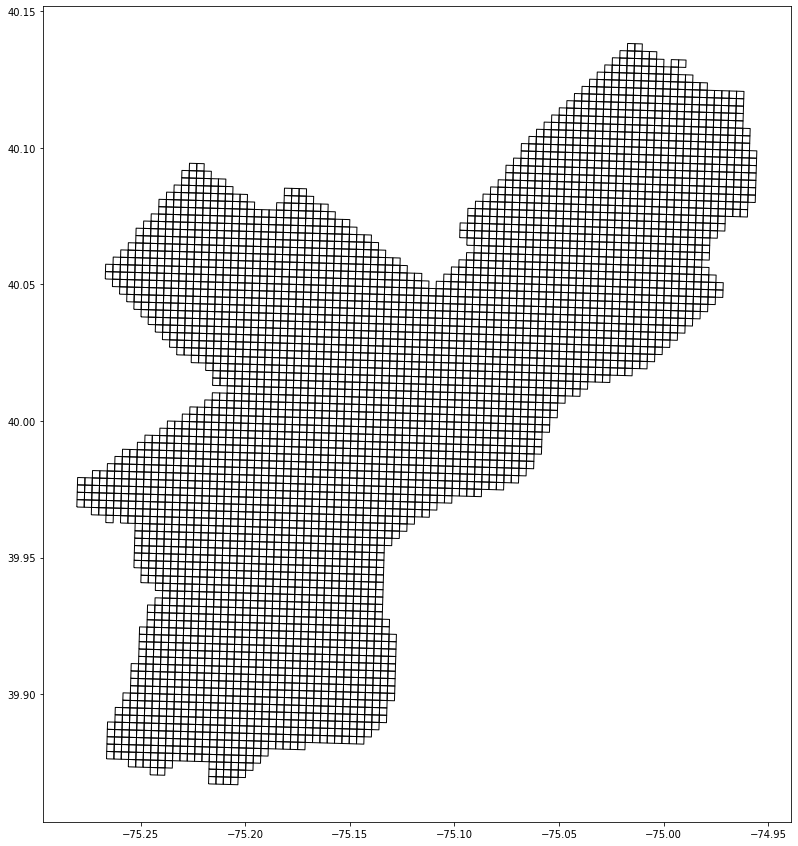

In [121]:
f,ax = plt.subplots(figsize=(15,15))
grid.plot(facecolor="#00000000",ec="black",ax=ax)

In [152]:
acsDataGeo["race"] = 1- (acsDataGeo.parkPercentage * acsDataGeo["White"]).rank(pct=True)//0.2*0.25 
acsDataGeo["income"] = 1- (acsDataGeo.parkPercentage * acsDataGeo["Median income"]).rank(pct=True)//0.2*0.25 

<AxesSubplot:>

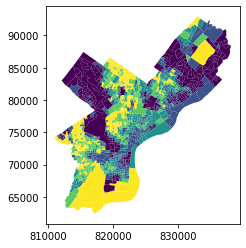

In [153]:
acsDataGeo.plot(column = "race")

<AxesSubplot:>

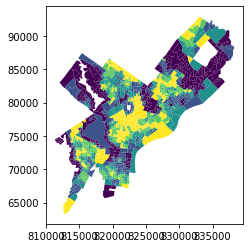

In [150]:
acsDataGeo.plot(column = "income")